# Project Progress

## The Model

### The General Model:

$$
\frac{dN_i}{dt}=\frac{r_i}{K_i}N_i(K_i-N_i) -N_i \sum_{j \neq i}{ \alpha_{ij}N_j} + \lambda_i
$$

...$\forall i = 1,...,S$, and where for species $i$:
* $N_i$ is the abundance
*  $r_i$ is the intrinsic growth rate
*  $K_i$ is the carrying capacity.
*  $\alpha_{ij}$ is the interaction of species $j$ on species $i$
*  $\lambda_i$ is an immigration term

#### Our Model


We set $K_i=r_i=1$, and $\lambda >0$ is uniform.
The elements of the interaction matrix $\alpha_{ij}$ are i.i.d random variables drawn from a normal distribution with first three moments as:

$$\overline{\alpha_{ij}} = \frac{\mu}{S},$$
$$\overline{(\alpha_{ij}-\overline{\alpha_{ij}})^2} = \frac{\sigma^2}{S},$$
$$\overline{(\alpha_{ij}-\overline{\alpha_{ij}})(\alpha_{ji}-\overline{\alpha_{ji}})} = \frac{ \gamma \sigma^2}{S}$$
 

so we have, with $a_{ij}$ drawn from $N(\frac{\mu}{S},\frac{\sigma^2}{S})$,

$$
\frac{dN_i}{dt}=N_i(1-N_i) -N_i \sum_{j \neq i}{ \alpha_{ij}N_j} + \lambda
$$
 

## Numerical Solutions of this Model:

### Notes on Generating a Random Matrix\Array

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def RM(mu,sigma,Num_Species):
    R = np.random.normal((mu)/(Num_Species),((sigma)**2)/(Num_Species),size=(Num_Species,Num_Species))
    np.fill_diagonal(R,0)
    return R

def X(mu,sigma,Num_Species):
    x = np.random.normal((mu)/(Num_Species),((sigma)**2)/(Num_Species),size=(Num_Species,1))
    return x
    


### Numeical Method

**Be careful about the $mu$ value- changes depending on the sign of the interaction term in the model**


In [5]:
import numpy as np
import matplotlib.pyplot as plt
    

def lotka_volterra(N, alpha):
    np.dot(alpha, N)  
    dNdt = N * (1 - N) - N * np.dot(alpha, N)
    return dNdt



def rk4_step(f, N, t, dt, h):
    k1 = f(N, h)
    k2 = f(N + 0.5 * dt * k1, h)
    k3 = f(N + 0.5 * dt * k2, h)
    k4 = f(N + dt * k3, h)
    return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)



def solve_lotka_volterra(alpha, N0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    N_values = np.zeros((len(t_values), len(N0)))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = rk4_step(lotka_volterra, N_values[i-1], t_values[i-1], dt, alpha)
    return t_values, N_values


# Parameters
S = 100
mu = 4 
sigma = 1


# Parameters for distribution
alpha_mean = mu / S
alpha_std = sigma / np.sqrt(S)



# Interaction Matrix
alpha = np.random.normal(alpha_mean, alpha_std,size=(S,S))
np.fill_diagonal(alpha, 0)

# Initial Abundances
N0 = np.random.uniform(0, 1, size=S)

# Max Time and Time step
t_max = 1000
dt = 0.1

bb = []
# Generative Values
for i in range(1,51):
    a = 0
    N02 = np.random.uniform(0, 1, size=S)
    alpha2 = np.random.normal(alpha_mean, alpha_std,size=(S,S))
    np.fill_diagonal(alpha2, 0)
    t_values, N_values = solve_lotka_volterra(alpha2, N02, t_max, dt)
    for r in N_values[-1]:
        if r<0.01:
            a=a+1
    bb.append(a)

bbarray = np.array(bb)
print(bbarray)
ans = np.sum(bbarray)/50

print(ans)


   
            

            



[38 32 32 40 49 33 36 38 34 35 29 28 39 33 38 35 39 33 31 37 24 39 34 36
 33 23 40 33 43 38 35 32 40 31 33 31 35 28 27 34 42 36 39 28 34 46 45 42
 29 28]
34.94


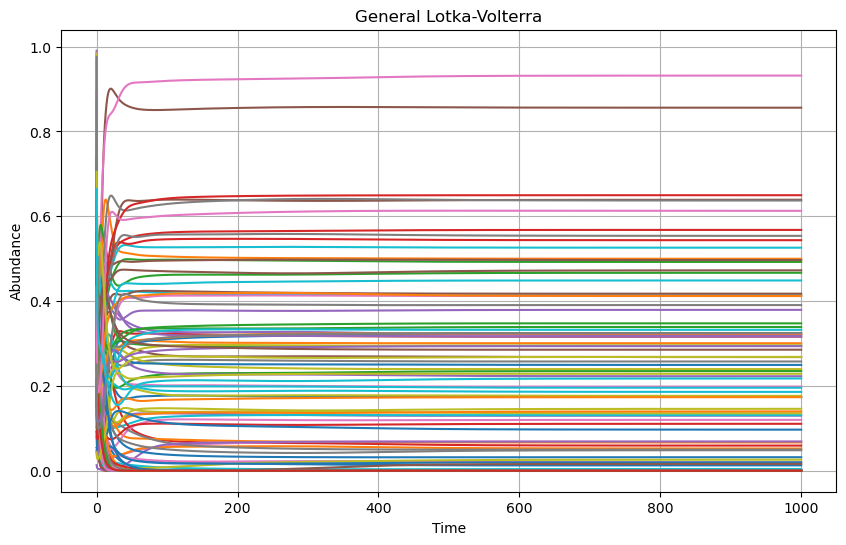

In [7]:
# Plotting results
plt.figure(figsize=(10, 6))
for i in range(S):
    plt.plot(t_values, N_values[:, i])
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('General Lotka-Volterra')
plt.grid(True)
plt.show()

Is it the same fixed point here? or where do you go to differetnt fixed point depening on intitail conditions

What happens if more species die? does it move into different attractors


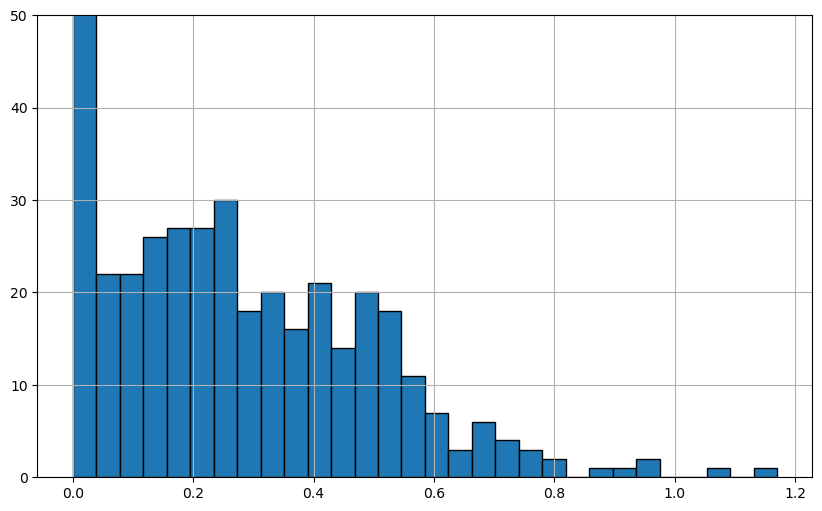

In [7]:
# Plotting Histogram
final_abundances = N_values[-1] 
plt.figure(figsize=(10, 6))
plt.hist(final_abundances, bins=30, edgecolor='black', alpha=1)
plt.grid(True)
plt.ylim(0,S//10)
plt.show()

### Unique Equilibrium Phase


#### Distance Type I ($d_1(t)$):

Euclidian Distance, measuring the instantaneous rate of change in the system
$$
\begin{aligned}
d_1(t) &= \lim_{dt \to 0} \frac{|N(t+dt)-N(t)|}{dt} \\
&= \lim_{dt \to 0} \frac{\sqrt{\sum_{i=1}^{S}(N_i(t+dt)-N_i(t))^2}}{dt}
\end{aligned}
$$
Converges to 0 as the system tends to unique Equilibria.


In [66]:
#d1 for most recent simulated fixed point
Vec = N_values[-1] - N_values[-2]
d1 = (np.dot(Vec,N_values[-1]))/(dt)

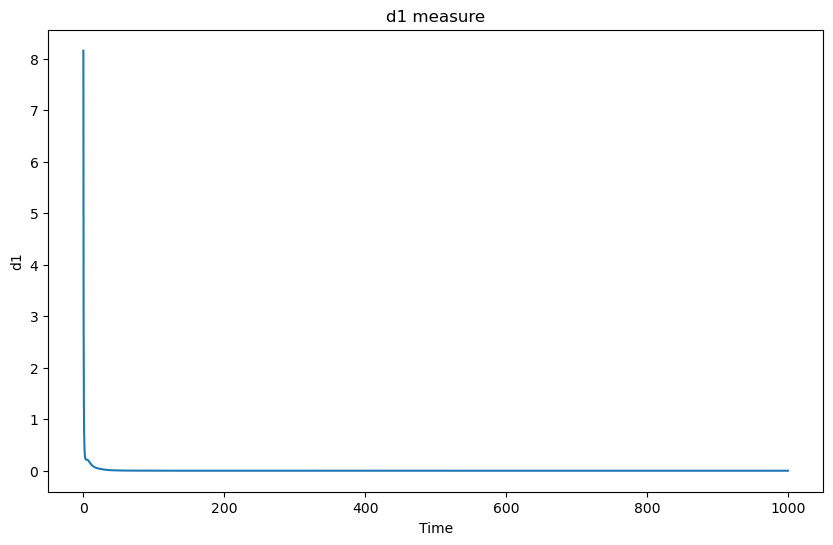

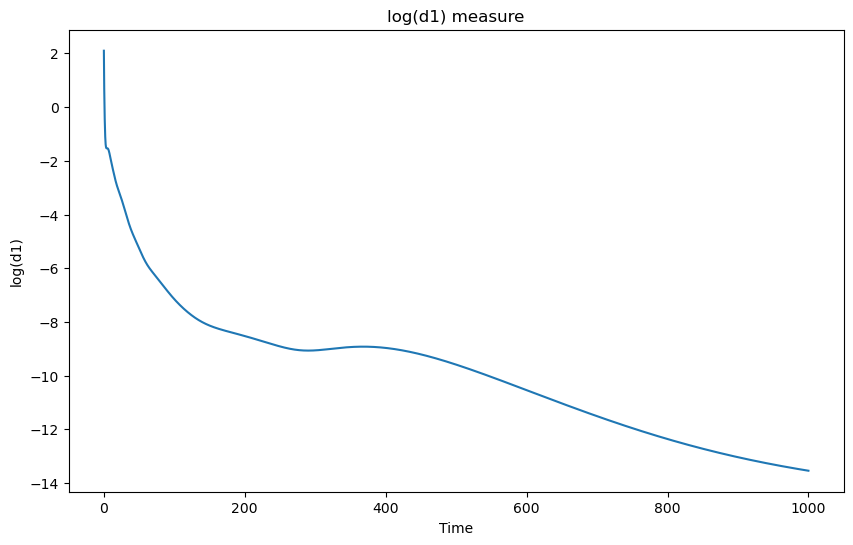

In [9]:
#plot of d1 throughout simulation
import numpy as np
from numpy import linalg as LA

d1_values = []
for i in range(1,len(N_values)):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt
    d1_values.append(d1)
    
t_d1 = t_values[1:]
plt.figure(figsize=(10, 6))
plt.plot(t_d1, d1_values,)
plt.xlabel('Time')
plt.ylabel('d1')
plt.title('d1 measure')
plt.show()

#plot of log(d1) throughout simulation
log_d1_values = []
for i in range(1,len(N_values)):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt
    log_d1 = np.log(d1)
    log_d1_values.append(log_d1)
    
t_d1 = t_values[1:]
plt.figure(figsize=(10, 6))
plt.plot(t_d1, log_d1_values,)
plt.xlabel('Time')
plt.ylabel('log(d1)')
plt.title('log(d1) measure')
plt.show()
    

#### Distance Type II ($d_2(t)$):

Measure divergence between trajectories starting from two initial states
$$d_2(t;N_1,N_2) = |N_1(t)-N_2(t)|$$, with $N_1(0)$ and $N_2(0)$ as two initial conditions.
* If Equilibrium is Unique, $d_2(t) \to 0$

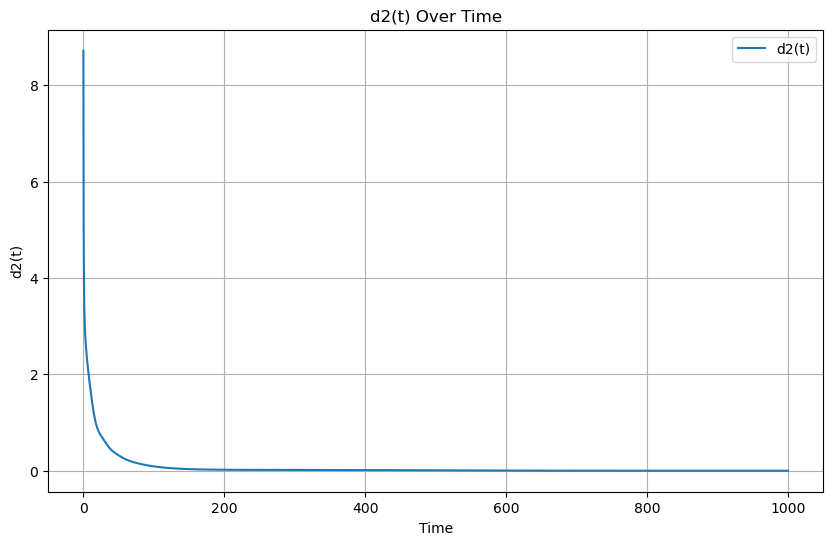

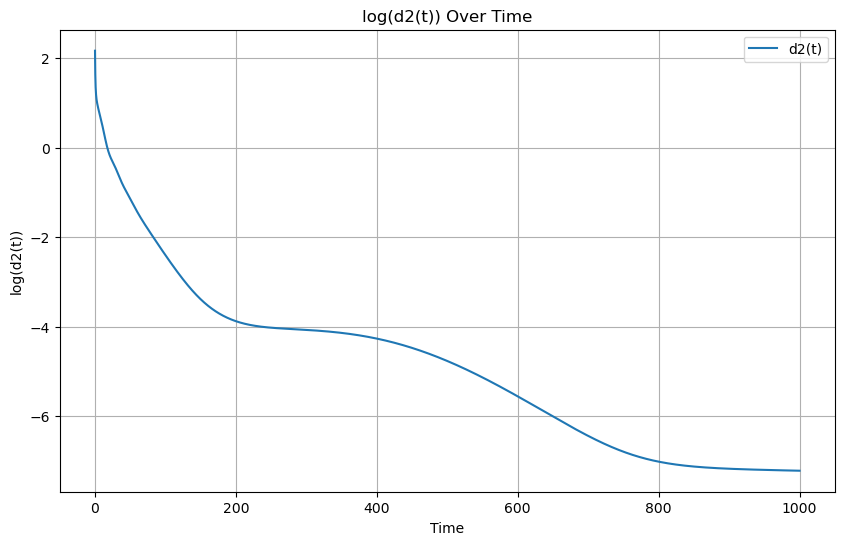

In [11]:
#Plotting d2 values in time
N0_1 = np.random.uniform(0, 1, size=S)  
N0_2 = np.random.uniform(0, 1, size=S)

t_values, N_values1 = solve_lotka_volterra(alpha, N0_1, t_max, dt)
t_values, N_values2 = solve_lotka_volterra(alpha, N0_2, t_max, dt)

d2_values = []
for i in range(len(t_values)):
    difference = np.linalg.norm(N_values1[i] - N_values2[i])
    d2_values.append(difference)

plt.figure(figsize=(10, 6))
plt.plot(t_values, d2_values, label='d2(t)')
plt.xlabel('Time')
plt.ylabel('d2(t)')
plt.title('d2(t) Over Time')
plt.grid(True)
plt.legend()
plt.show()

#Plotting log(d2) values in time

log_d2_values = []
for i in range(len(t_values)):
    difference = np.linalg.norm(N_values1[i] - N_values2[i])
    loggywoggy = np.log(difference)
    log_d2_values.append(loggywoggy)

plt.figure(figsize=(10, 6))
plt.plot(t_values, log_d2_values, label='d2(t)')
plt.xlabel('Time')
plt.ylabel('log(d2(t))')
plt.title('log(d2(t)) Over Time')
plt.grid(True)
plt.legend()
plt.show()


## Dynamical Mean Field Theory (DMFT)

### Overview

Setting up the gLV dynamics in this way defines a 'quenched random disordered system', which means the random variables are selected once and then remain constant throughout the dynamics.

To formulate a DMFT for the gLV equations we look at the following system:
$$
\frac{dN_i}{dt}= N_i(t)\Bigg(1 - N_i(t) + \sum_{j \neq i} \alpha_{ij}N_j(t) + h_i(t)\Bigg)
$$
Where we have added $h_i(t)$ as an arbitrary perturbing function used to define $G(t,t')$ 
we want to derive an **Effective Single-Species Equation** that will describe the dynamics of a 'typical' species:
$$
\frac{dN_i}{dt}= N_i(t)\Bigg(1 - N_i(t)  + \mu M(t)+ \gamma \sigma^2 \int_{0}^{t}dt'G(t,t')x(t')+\eta(t)+h(t)\Bigg)
$$
Where :
$$
\begin{aligned}
M(t) &= \langle x(t) \rangle _{\eta} \\ 
C(t,t') &= \langle x(t)x(t') \rangle _{\eta} = \langle \eta(t)\eta(t') \rangle _{\eta}\\
G(t,t') &= \frac{\delta \langle x(t) \rangle _{\eta}}{\delta \langle h(t') \rangle}
\end{aligned}
$$




* $M(t)$ is the average abundance of species equal to $ \frac{1}{N} \sum_i \langle x_i(t) \rangle _{\alpha}$
* $C(t,t') =  \frac{1}{N} \sum_i \langle x(t)x(t') \rangle _{\alpha} $
* $G(t,t') = \frac{1}{N} \sum_i \frac{\delta \langle x(t) \rangle _{\alpha}}{\delta h(t')}$ is the responce function which measures the responce in the average abundance at time $t$ due to pertubation $h$ at earlier time $t'$.

### Fixed Point Analysis

Suppose random gLV dynamics reach a fixed point $N_i(t)\rightarrow N^*$ as $t \rightarrow \infty $

Noise term $\eta(t)$ approaches static, mean zero Gaussian random varible $\eta ^* = \sigma \sqrt{q}z$, where $q = \langle (N^*)^2 \rangle _z$ for mean zero, unit varience Gaussian Random Variable.
$$
0 = N^*(1-x^*+\mu M+\sigma \sqrt{q} z + \gamma \sigma^2 \chi N^* +h)
$$

where $\langle z^2 \rangle _z = 1$
$$
\begin{aligned}
M &= \langle x^* \rangle _z \\
q &= \langle  (x^*)^2 \rangle _z \\
\chi &= \frac{\delta \langle x^* \rangle _z }{\delta h}
\end{aligned}
$$

Rearranged to:
$$
x^*(z) = max\Bigg(0,\frac{1+\mu M + \sigma \sqrt{q}z +h}{1-\gamma \sigma^2 \chi}\Bigg)
$$

Leads to the set of following self-consistency condition for $M,q,\chi$

#### Solving the Self-Consistent Equations

**Step 1**: Solving Numerically for $\Delta$:
$$I_1 = \int_{-\infty}^{\Delta}Dz (\Delta -z)^2$$
for 
$Dz = \frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2} $ 
solves to:
$$\frac{1}{2} \left( x^2+1 \right) \left( \text{erf}\left(\frac{x}{\sqrt{2}}\right)+1\right) +\frac{e^{-\frac{-x^2}{2}}x}{\sqrt{2\pi}}$$
From the results of the CDF of the Gaussian Error function.

**Find an approximation for erf, find a solution for $\Delta$, import math and use math.erf()???????**

**Step 2**: solving for $\sigma$, $1 = {\sigma}^2 I_1 $

**Step 3**: Solve with known $\Delta$:
$$ I_2 = \int_{-\infty}^{\Delta} Dz(\Delta - z)$$

**Step 4**: Solve $M$ and $q$ from equations:
$$
\begin{aligned}
M &= \sigma \sqrt{q} I_2 \\
\Delta &= \frac{1+\mu M}{\sigma \sqrt{q}}
\end{aligned}
$$

#### Generate a Truncated Gaussian plot over the histogram, and generate for population survival distribution.

#### Linear Stability Analysis of the fixed point using the RMT to derive the $\sigma = \sqrt{2}$ fact.

#### Plot $log(d_1)$ agaisnt $\sigma$ to find experimently see the $\sigma = \sqrt{2}$ boundary.
- see what happens for larger S? does accuracy increase?

#### Exploring the impact of the Plataue regions in the MA phase.


**When in the Predicted MA phase is the sometimes present Fixed Point always the same? aka does it sometime collapse to a unique Equilibria?**

# New Results Since Last Meeting

## Solving Self Consistent Equations


### Equations:

For Gaussian Measure $Dz = \frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2}$
$$
\begin{aligned}
M &= \frac{\sigma \sqrt{q}}{1- \gamma \sigma^2 \chi} \int_{-\infty}^{\Delta}Dz(\Delta - z) \\
1 &= \frac{\sigma^2}{(1-\gamma \sigma^2 \chi)^2}\int_{-\infty}^{\Delta}Dz(\Delta - z)^2 \\
\chi &= \frac{1}{1-\gamma \sigma^2 \chi}\int_{-\infty}^{\Delta}Dz
\end{aligned} 
$$
where,
$$\Delta = \frac{1+\mu M +h}{\sigma \sqrt{q}}$$

For Our case $\gamma = 0$, these simplify to:
$$
\begin{aligned}
M &= \sigma \sqrt{q} \int_{-\infty}^{\Delta}Dz(\Delta - z) = \sigma \sqrt{q} \int_{-\infty}^{\Delta}\frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2}(\Delta - z)\\
1 &=\sigma^2\int_{-\infty}^{\Delta}Dz(\Delta - z)^2 = \sigma^2\int_{-\infty}^{\Delta}\frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2}(\Delta - z)^2\\
\chi &= \int_{-\infty}^{\Delta} Dz= \int_{-\infty}^{\Delta}\frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2}
\end{aligned} 
$$

Solving the second Equation in terms of the Guassian error function we get:
$$ 
\frac{1}{\sigma^2} = \int_{-\infty}^{\Delta}Dz(\Delta - z)^2 = \frac{1}{2} \left( \Delta^2+1 \right) \left( \text{erf}\left(\frac{\Delta}{\sqrt{2}}\right)+1\right) +\frac{e^{-\frac{-\Delta^2}{2}}\Delta}{\sqrt{2\pi}}
$$
so,
$$ \sigma = \frac{1}{\sqrt{\frac{1}{2} \left( \Delta^2+1 \right) \left( \text{erf}\left(\frac{\Delta}{\sqrt{2}}\right)+1\right) +\frac{e^{-\frac{-\Delta^2}{2}}\Delta}{\sqrt{2\pi}}}}$$



### Finding Delta

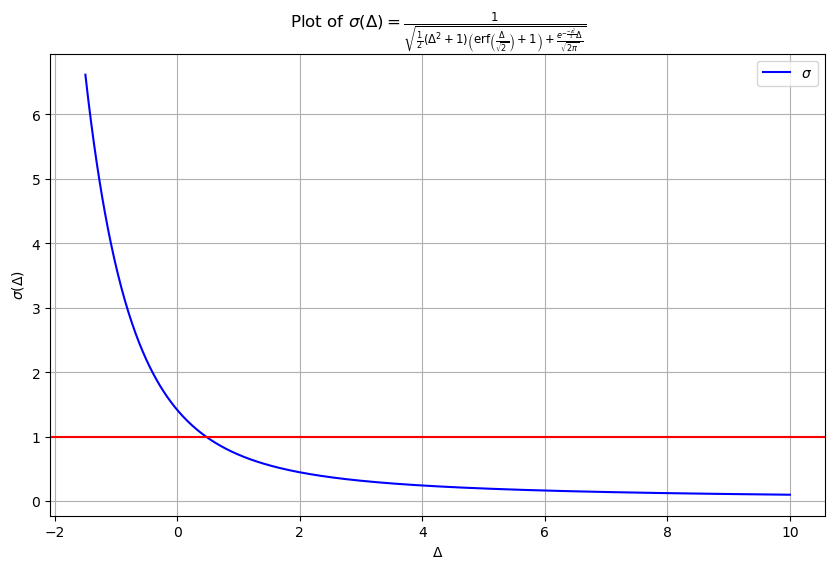

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

DMFT_sigma = 1
DMFT_mu = 4

# Define the function
def sigma(Delta):
    term = (0.5 * (Delta**2 + 1) * (special.erf(Delta / np.sqrt(2)) + 1) + (np.exp(-Delta**2 / 2) * Delta) / np.sqrt(2 * np.pi))
    ans = 1/np.sqrt(term)
    return ans

# Generate values for Delta
Delta_values = np.linspace(-1.5, 10, 1000)
f_values = sigma(Delta_values)



# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(Delta_values, f_values, label=r"$\sigma$", color='blue')
plt.axhline(y = DMFT_sigma, color = 'red')
plt.xlabel(r"$\Delta$")
plt.ylabel(r"$\sigma(\Delta)$")
plt.title(r"Plot of $\sigma(\Delta) = \frac{1}{\sqrt{\frac{1}{2} \left( \Delta^2+1 \right) \left( \text{erf}\left(\frac{\Delta}{\sqrt{2}}\right)+1\right) +\frac{e^{-\frac{-\Delta^2}{2}}\Delta}{\sqrt{2\pi}}}}$")
plt.grid(True)
plt.legend()
plt.show()


0.470655352618

In [5]:
from scipy import optimize

root = optimize.bisect((sigma-, 0, 2)

    
    
    
    




    


0.47065535261819946
0.47065535261829944
0.4706553526183994


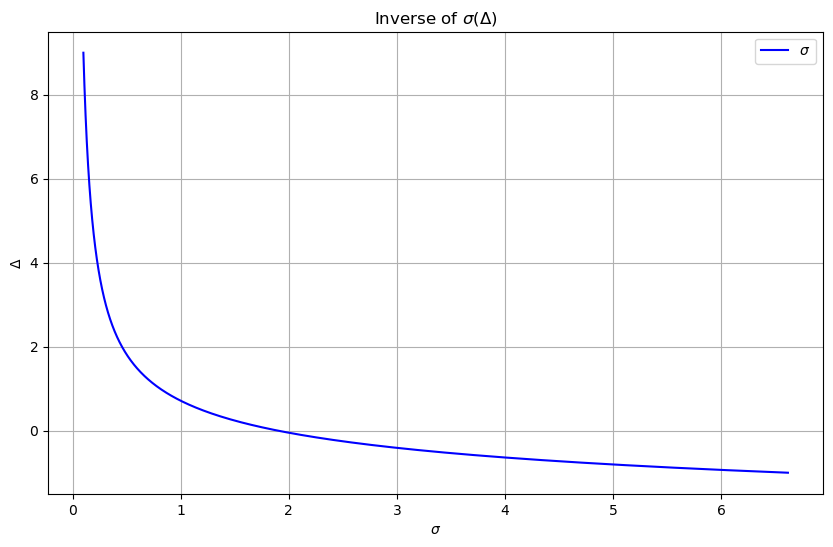

In [81]:
######### Plot inverse


plt.figure(figsize=(10, 6))
plt.plot(f_values,Inv_Delta_values , label=r"$\sigma$", color='blue')
plt.title(r"Inverse of $\sigma(\Delta)$")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\Delta$")
plt.grid(True)
plt.legend()
plt.show()



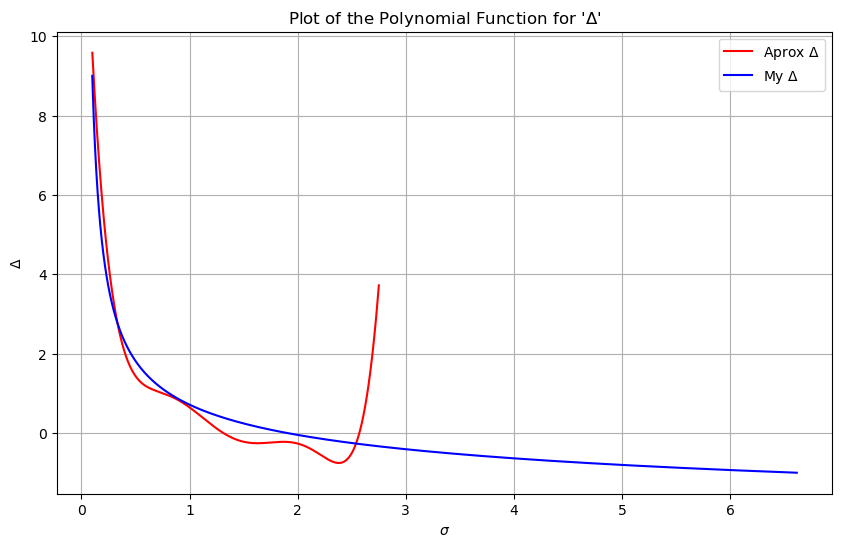

Gives the Polynomail approx Delta vaule:
0.6444000000000045


In [7]:
##This Polynomail Aproxximation

def polynomial(sigma):
    return (3.6901 * sigma**6
            - 32.1303 * sigma**5
            + 110.5522 * sigma**4
            - 190.8928 * sigma**3
            + 173.6226 * sigma**2
            - 80.2479 * sigma
            + 16.0505)

# Generate values for sigma
sigma_values = np.linspace(0.1, 2.75, 1000)  
Inv_Delta_values = np.linspace(-1, 9, 1000)
polynomial_values = polynomial(sigma_values)


# Plot the polynomial function
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, polynomial_values, label=r"Aprox $\Delta$", color='red')
plt.plot(f_values,Inv_Delta_values , label=r"My $\Delta$", color='blue')
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\Delta$")
plt.title(r"Plot of the Polynomial Function for '$\Delta$'")
plt.grid(True)
plt.legend()
plt.show()

ans = polynomial(1)
print("Gives the Polynomail approx Delta vaule:")
print(ans)


### Solving For M and q


Working with $\Delta = 0.470655352618$

In [11]:
My_Delta = 0.470655352618
Sigma_2 = 1
Mu_2 = 1


Working with the equations, for known $\Delta, \sigma, \mu$:
$$
\begin{aligned}
M &= \sigma \sqrt{q} \int_{-\infty}^{\Delta}Dz(\Delta - z) = \sigma \sqrt{q} \int_{-\infty}^{\Delta}\frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2}(\Delta - z) \\
\Delta &= \frac{1+\mu M }{\sigma \sqrt{q}}
\end{aligned}
$$
So for M we get

Letting $I(\Delta) = \int_{-\infty}^{\Delta}\frac{dz}{\sqrt{2 \pi}}e^{-\frac{1}{2}z^2}(\Delta - z)$ and so $M = \sigma \sqrt{q} I(\Delta)$
$$
\sigma \sqrt{q} = \frac{M}{I(\Delta)} = \frac{1+\mu M}{\Delta}
$$
so,
$$M = \frac{I}{\Delta - \mu I}$$
for $I = \frac{\Delta}{2} \left(\text{erf}\left(\frac{\Delta}{\sqrt{2}} \right)+1\right) + \frac{e^{-\frac{\Delta^2}{2}}}{\sqrt{2 \pi}{}}$

In [35]:
def I(D):
    term_1 = 0.5 * (D) * (special.erf(D / np.sqrt(2)) + 1) 
    term_2 = np.exp((-D**2) / 2) / np.sqrt(2 * np.pi)
    return term_1 + term_2

up = I(My_Delta)
print(up)
down = My_Delta + (Mu_2 * up)
print(down)

ans = up/down 
print(ans)



    





0.6776581516039601
1.14831350422196
0.590133399208875


In [42]:
M = 0.590133399208875
My_Delta = 0.470655352618
Sigma_2 = 1
Mu_2 = 1


Then for $q$:
$$q = \left(\frac{1 + \mu M}{\sigma \Delta }\right)^2$$

In [46]:
def Solve_q(mu, m, delta, sigma):
    who = (1 + mu*m)/(sigma*delta)
    what = who**2
    return what

print(Solve_q(Mu_2, M , My_Delta, Sigma_2))



11.414610979512846


## One code for $\Delta , M $ and $q$

In [70]:
##### ALL TOGETHER NOWWW!!!!!
import numpy as np
from scipy import optimize
Sigma_2 = 1
Mu_2 = 1
a = 0
b = 2

# the Root of f is the Delta solution 
def f(delta):
    term = (0.5 * (delta**2 + 1) * (special.erf(delta / np.sqrt(2)) + 1) + (np.exp(-delta**2 / 2) * delta) / np.sqrt(2 * np.pi))
    ans = term - 1/(Sigma_2**2)
    return ans

# Finds Delta from the region a to b.
def find_Delta(a,b):
    delta = optimize.bisect(f, a, b)
    return delta

# Integral Function for solving M
def I(D):
    term_1 = 0.5 * (D) * (special.erf(D / np.sqrt(2)) + 1) 
    term_2 = np.exp((-D**2) / 2) / np.sqrt(2 * np.pi)
    return term_1 + term_2

D = find_Delta(a,b)
# Solving for M
def find_M(D):
    t1 = I(D)
    t2 = D + (Mu_2 * t1)
    ans = t1/t2
    return ans

def Solve_q():
    M = find_M(D)
    Del = find_Delta(a,b)
    who = (1 + Mu_2*M )/(Sigma_2*Del)
    q = who**2
    return q

print("Delta=", find_Delta(a,b))
print(r"M=" ,find_M(D))
print(r"q=" ,Solve_q())

Delta= 0.4706553526175412
M= 0.5901333992089992
q= 11.414610979536882


### Plotting Distribution


In [79]:
#For Mu = 4, Sigma =1 dynamics
Delta= 0.4706553526175412
M= 0.5901333992089992
q= 11.414610979536882

The proportion of surviving species $\phi = \int_{-\infty}^{\Delta} Dz =\frac{1}{2} \left( \text{erf} \left(\frac{\Delta}{\sqrt{2}}\right)+1 \right) $

In [81]:
def phi(delta):
    ans = 0.5 * (delta) * (special.erf(delta / np.sqrt(2)) + 1) 
    return ans


Species Abundance Distribution is a truncated normal distribution with mean $m = \frac{1+\mu M+h}{1-\gamma \sigma^2 \chi}$ and varience $v = \frac{\sigma^2 q}{(1-\gamma \sigma^2 \chi)^2}$. or for our purposes simplified to $m =1 + \mu M$ and $v = \sigma^2 q$.

S0, about the fixed point, $x^*$ we have:
$$
Pr(x^*) = (1-\phi)\delta(x^*) + \frac{1}{\sqrt{2 \pi v}} e^{-\frac{1}{2}\left( \frac{x-m}{v} )^2\right)}
$$

In [95]:
m = 1+Mu_2*M
v = (Sigma_2**2)*q
std_dev = np.sqrt(v)



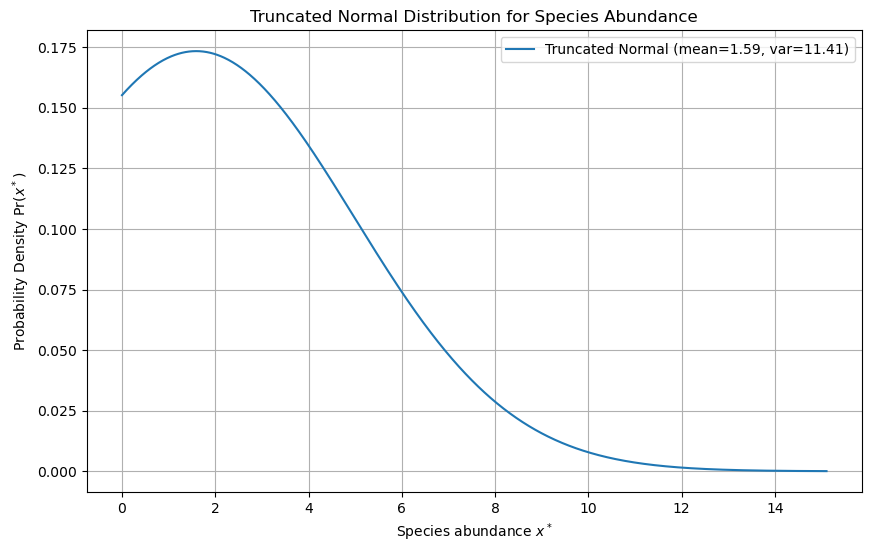

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

a, b = 0, np.inf  # truncation limits (a=0 for clipping at zero)
trunc_norm_dist = truncnorm(a=(0 - m) / std_dev, b=(np.inf - m) / std_dev, loc=m, scale=std_dev)

# Generate x* values and compute probabilities
x_vals = np.linspace(0, m + 4 * std_dev, 1000)  # Range from 0 to a few standard deviations above mean
pdf_vals = trunc_norm_dist.pdf(x_vals)          # Probability density function values

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x_vals, pdf_vals, label=f"Truncated Normal (mean={m:.2f}, var={v:.2f})")
plt.xlabel(r"Species abundance $x^*$")
plt.ylabel(r"Probability Density $\Pr(x^*)$")
plt.title("Truncated Normal Distribution for Species Abundance")
plt.legend()
plt.grid(True)
plt.show()
